In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Importing Neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import nltk
import string
import nlputils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import re
from wordcloud import WordCloud, STOPWORDS

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import os
import zipfile
import warnings
warnings.filterwarnings('ignore')



In [5]:
kaggle_input_path = '/mnt/22A63810A637E2C9/Code/College/Twitch-Spam-detection/Data/jigsaw-toxic-comment-classification-challenge'

files_in_directory = os.listdir(kaggle_input_path)
print(files_in_directory)


for file_name in files_in_directory:
    # Skip non-zip files if any
    if not file_name.endswith('.zip'):
        continue

    # Path to the zip file
    zip_file_path = os.path.join(kaggle_input_path, file_name)

    # Directory where you want to extract the contents
    output_dir = '/mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output'

    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
        # Print complete paths of the extracted files
        extracted_files = zip_ref.namelist()
        for extracted_file in extracted_files:
            complete_path = os.path.join(output_dir, extracted_file)
            print("Extracted:", complete_path)


['sample_submission.csv.zip', 'test.csv.zip', 'test_labels.csv.zip', 'train.csv.zip']
Extracted: /mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output/sample_submission.csv
Extracted: /mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output/test.csv
Extracted: /mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output/test_labels.csv
Extracted: /mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output/train.csv


In [6]:
data = pd.read_csv("/mnt/22A63810A637E2C9/Code/Twitch-Spam-detection/Data/output/train.csv")
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
131926,c1eea742f031fe4b,""", 20 June 2008 (UTC)\nHow is it a strawman ar...",0,0,0,0,0,0
41054,6d8866b39064bd32,""":::Why is it that gets to shut everyone down...",0,0,0,0,0,0
155450,be2e15be3ea682ff,I don't think that a list of practical suggest...,0,0,0,0,0,0
133464,ca0136a0cfdd1628,See you in two days. \n\nHahahaha. You protect...,1,0,1,0,1,1
55218,937a4c0b396eb6b6,"""Hi. I'm from the Willamette congregation Eug...",0,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
data['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [10]:
data['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [11]:
data['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [12]:
data['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [13]:
data['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [14]:
data['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [15]:
df = pd.DataFrame(data)

In [16]:
sentencetype_graph=df.iloc[:,2:].sum()

In [17]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

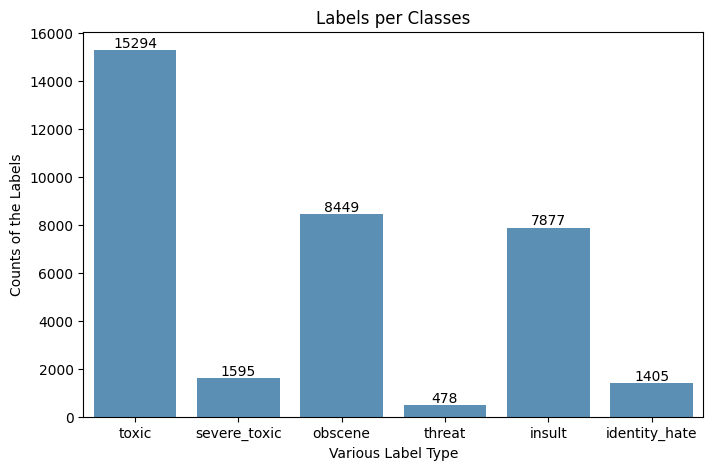

In [18]:
import seaborn as sns
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = data[labels].values
import matplotlib.pyplot as plt
val_counts = data[labels].sum()
plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")
rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")
plt.show()

In [19]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [20]:
import re
import string

In [21]:
# Removing special characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [22]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]

In [23]:
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]

In [24]:
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]

In [25]:
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]

In [26]:
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]

In [27]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

In [28]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [29]:
def wordcloud(df, label):

    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)


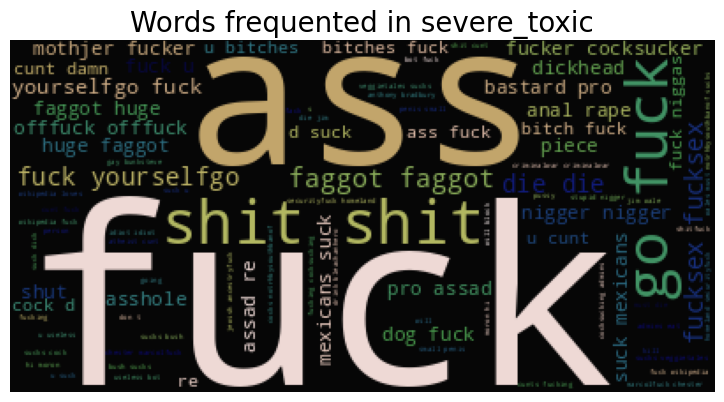

In [30]:
wordcloud(Severetoxic_comment_df,'severe_toxic')

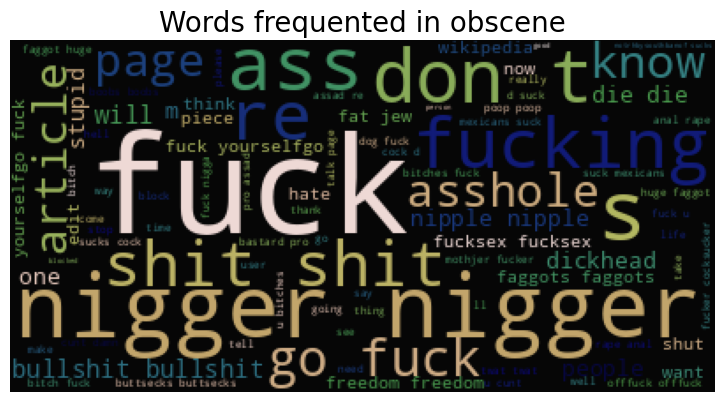

In [31]:
wordcloud(Obscene_comment_df,'obscene')

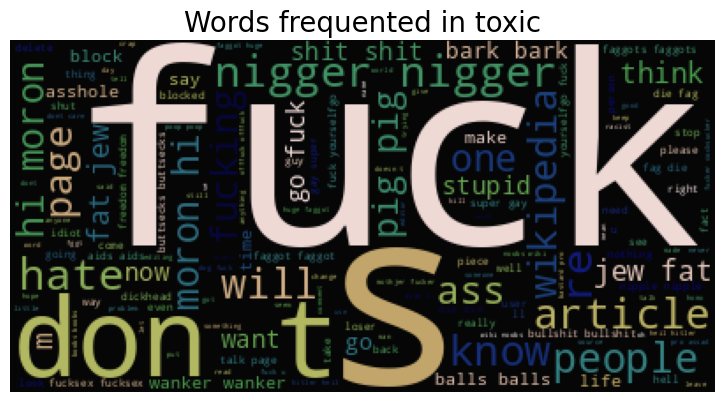

In [32]:
wordcloud(Toxic_comment_df,'toxic')

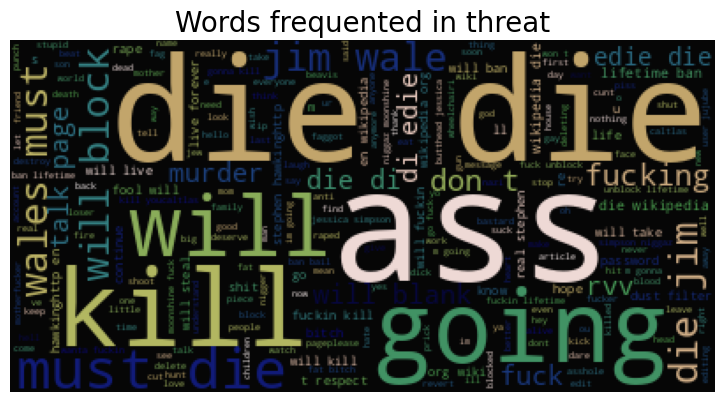

In [33]:
wordcloud(Threatening_comment_df,'threat')

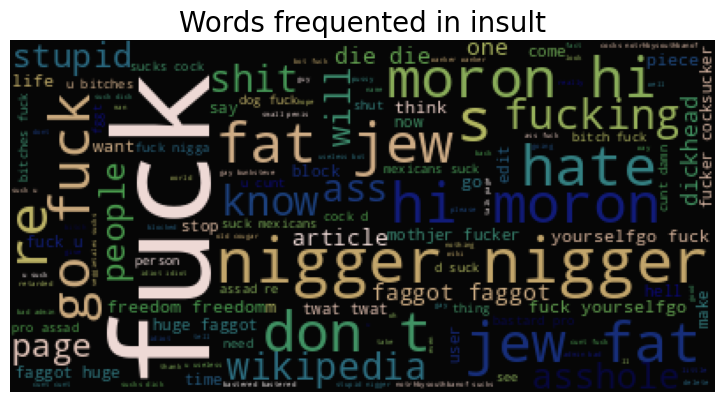

In [34]:
wordcloud(Insulting_comment_df,'insult')

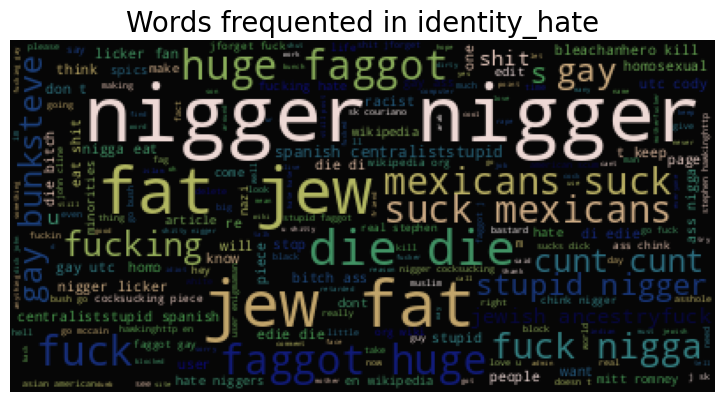

In [35]:
wordcloud(IdentityHate_comment_df,'identity_hate')

In [36]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]


In [37]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]


In [38]:
Toxic_comment_balanced_1.shape

(5000, 3)

In [39]:
Toxic_comment_balanced_0.shape

(5000, 3)

In [40]:
Toxic_comment_balanced_1['toxic'].value_counts()

toxic
1    5000
Name: count, dtype: int64

In [41]:
Toxic_comment_balanced_0['toxic'].value_counts()

toxic
0    5000
Name: count, dtype: int64

In [42]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])


In [43]:
Toxic_comment_balanced['toxic'].value_counts()

toxic
1    5000
0    5000
Name: count, dtype: int64

In [44]:
Severetoxic_comment_df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [45]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]


In [46]:
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]


In [47]:
Severe_toxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])


In [48]:
Severe_toxic_comment_balanced['severe_toxic'].value_counts()

severe_toxic
1    1595
0    1595
Name: count, dtype: int64

In [49]:
Obscene_comment_df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [50]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]


In [51]:
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]


In [52]:
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])


In [53]:
Obscene_comment_balanced['obscene'].value_counts()

obscene
1    5000
0    5000
Name: count, dtype: int64

In [54]:
Threatening_comment_df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [55]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]


In [56]:
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]


In [57]:
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])


In [58]:
Threatening_comment_balanced['threat'].value_counts()

threat
1    478
0    478
Name: count, dtype: int64

In [59]:
Insulting_comment_df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [60]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]


In [61]:
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]


In [62]:
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])


In [63]:
Insulting_comment_balanced['insult'].value_counts()

insult
1    5000
0    5000
Name: count, dtype: int64

In [64]:
IdentityHate_comment_df['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [65]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]


In [66]:
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:5000,:]


In [67]:
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])


In [68]:
IdentityHate_comment_balanced['identity_hate'].value_counts()


identity_hate
0    5000
1    1405
Name: count, dtype: int64

In [69]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [70]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]

    # Split our data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    # Using vectorizer and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')

    # Transforming x-train and x-test
    X_train_cv1 = cv1.fit_transform(X_train)
    X_test_cv1  = cv1.transform(X_test)

    ## Machine learning models

    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)

    ## k-nearest neighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)

    ## Multinomial naive bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)

    ## Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    ## Random Forest
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)

    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test),
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]}
    ## Saving f1 score results into a dataframe
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])

    return df_f1

In [71]:
severe_toxic_comment_cv = cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.940282
KNN,0.861407
BernoulliNB,0.790738
MultinomialNB,0.932377
SVM,0.937901
Random Forest,0.941176


In [72]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.897338
KNN,0.852459
BernoulliNB,0.745205
MultinomialNB,0.902098
SVM,0.894737
Random Forest,0.923077


In [73]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.901851
KNN,0.379693
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.890821


In [74]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv

,F1 Score(identity_hate)
Log Regression,0.714706
KNN,0.188184
BernoulliNB,0.715976
MultinomialNB,0.564103
SVM,0.809399
Random Forest,0.846939


In [75]:
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [76]:
comment1 = ['go kill yourself']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.98833333])

In [77]:
comment2 = ['chutiya']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.30213203])

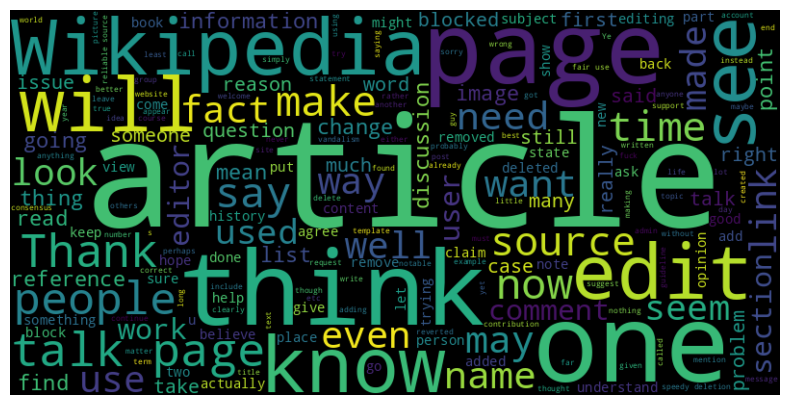

In [78]:
# Word frequency analysis
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(data['comment_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


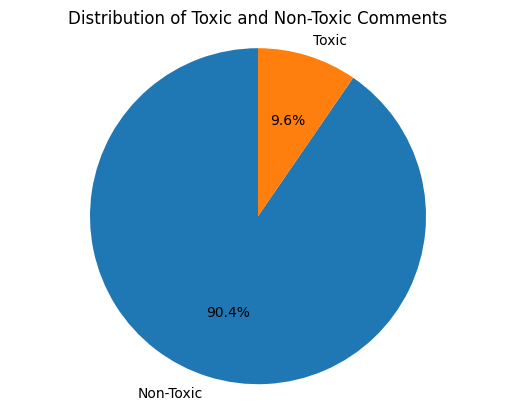

In [79]:
# Class balance visualization
plt.pie(data['toxic'].value_counts(), labels=['Non-Toxic', 'Toxic'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Toxic and Non-Toxic Comments')
plt.show()



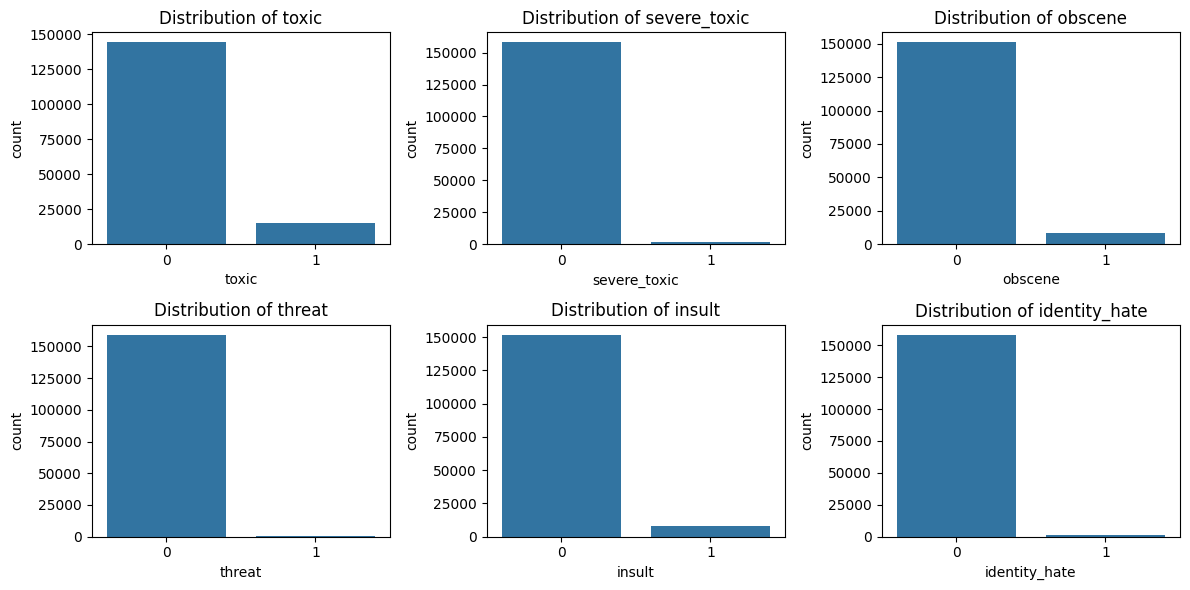

In [81]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=label, data=data)
    plt.title(f'Distribution of {label}')
plt.tight_layout()
plt.show()